# First Exploratory Data Analysis 

Import necessary dependencies

In [3]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

Set directories for project and data folders

In [4]:
CURRENT_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(os.path.dirname(CURRENT_DIR))
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed')

Load descriptions and descriptive names for scale

In [6]:
# Set the processed data path
current_dir = os.getcwd()
project_root = os.path.dirname(os.path.dirname(current_dir))
PROCESSED_DATA_PATH = os.path.join(project_root, 'data', 'processed')
RAW_DATA_PATH = os.path.join(project_root, 'data', 'raw')

# Load the JSON file containing the shorter descriptions
with open(PROCESSED_DATA_PATH + '/codes.json', 'r') as f:
    codes = json.load(f)

# Create a mapping of original codes to descriptive names
code_to_name = {item['original_code']: item['descriptive_name'] for item in codes}

# Load the data (assuming you have a CSV file named 'data.csv')
data = pd.read_excel(RAW_DATA_PATH + '/HPM data_environmental performance.xlsx')

# Rename columns using the shorter descriptions
data.rename(columns=code_to_name, inplace=True)

# Display the first few rows of the dataset to get a feel for the data
print(data.head())

# Summary statistics
print("\nSummary Statistics:\n")
print(data.describe())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

  COUNTRY  COMPANY CODE  INDUSTRY  Environmentally Preferable Packaging  \
0     BRA          1701         3                                   4.0   
1     BRA          1702         1                                   NaN   
2     BRA          1703         1                                   3.0   
3     BRA          1704         3                                   2.0   
4     BRA          1705         3                                   2.0   

   Third Party Monitoring of Supplier Working Conditions  Water Efficiency  \
0                                                2.0                   4.0   
1                                                NaN                   NaN   
2                                                2.0                   3.0   
3                                                4.0                   2.0   
4                                                1.0                   3.0   

   Substituting Environmentally Preferable Direct Materials  \
0                

In [9]:
len(codes)

68

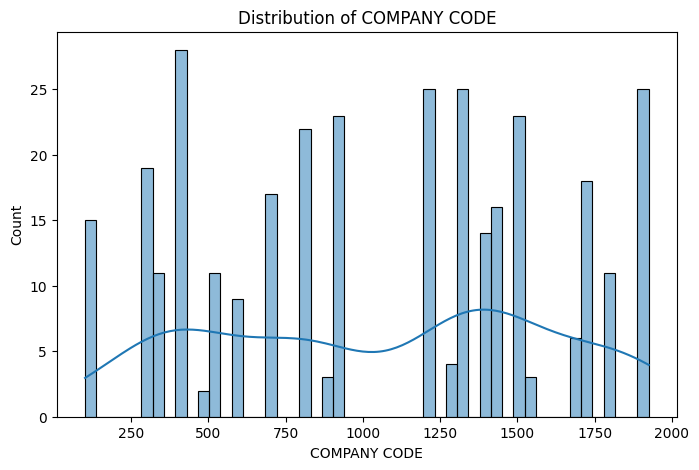

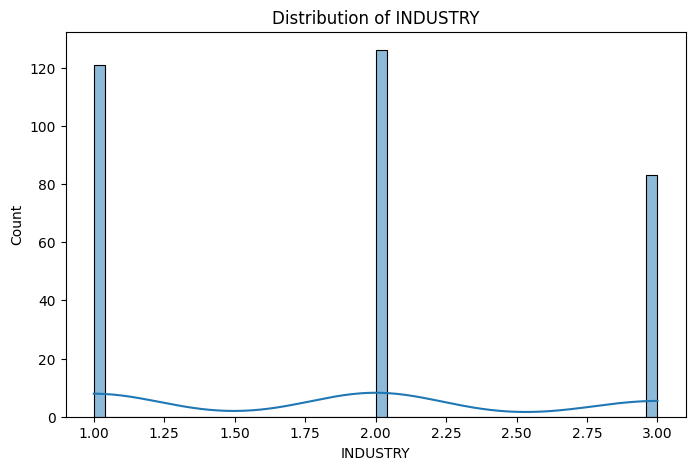

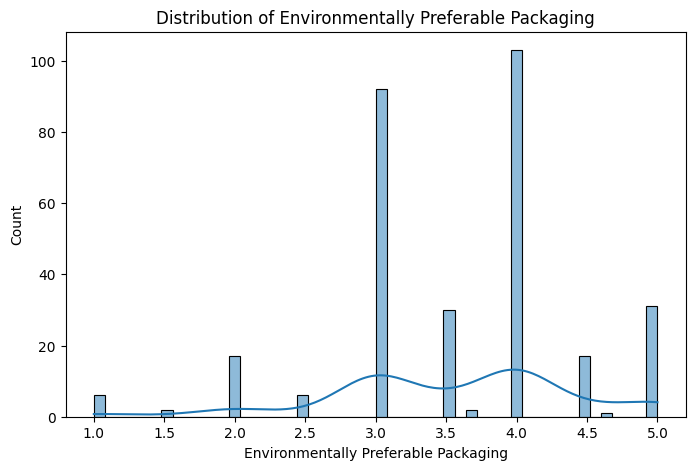

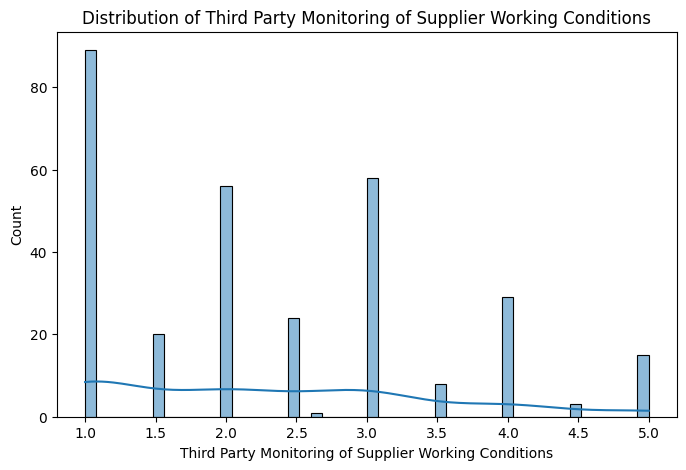

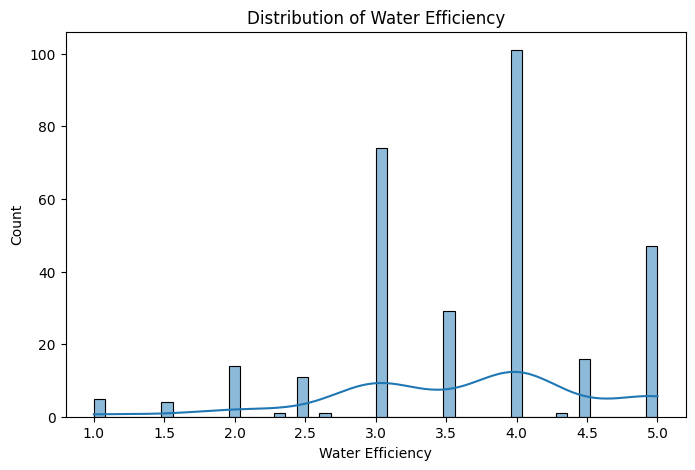

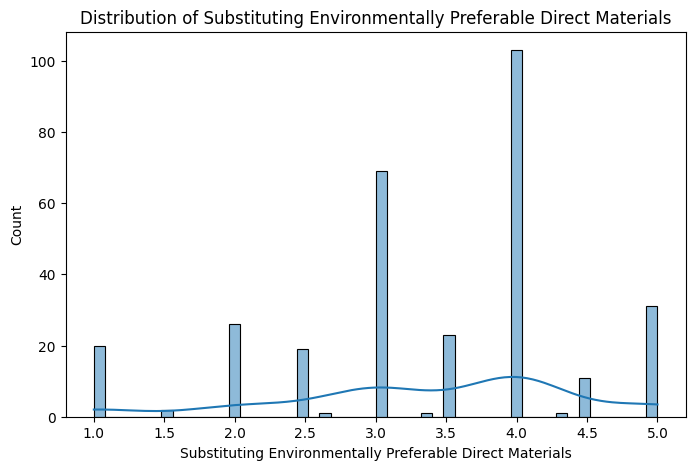

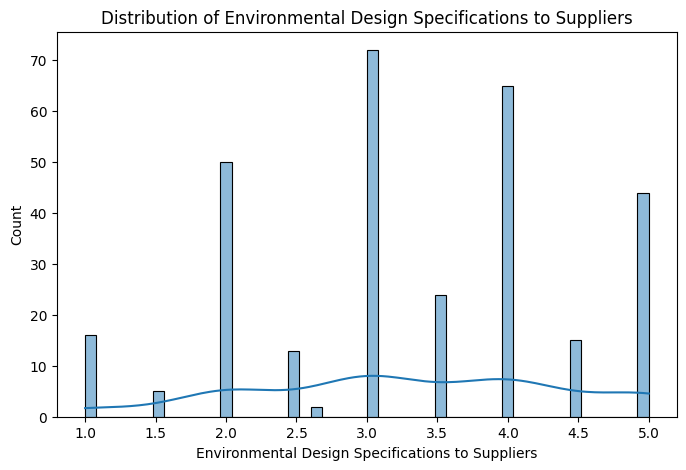

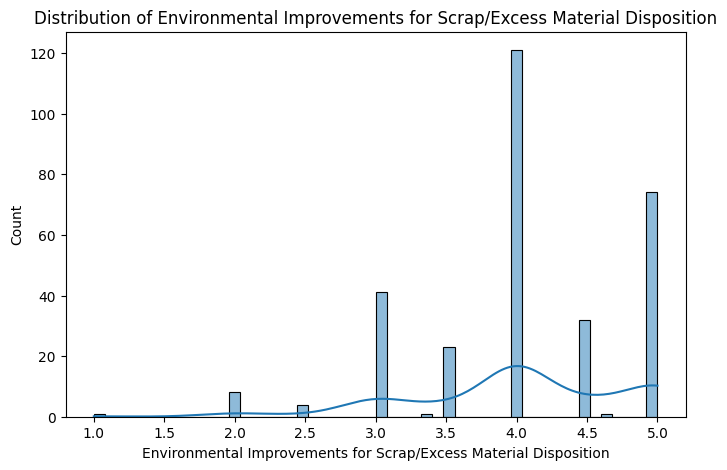

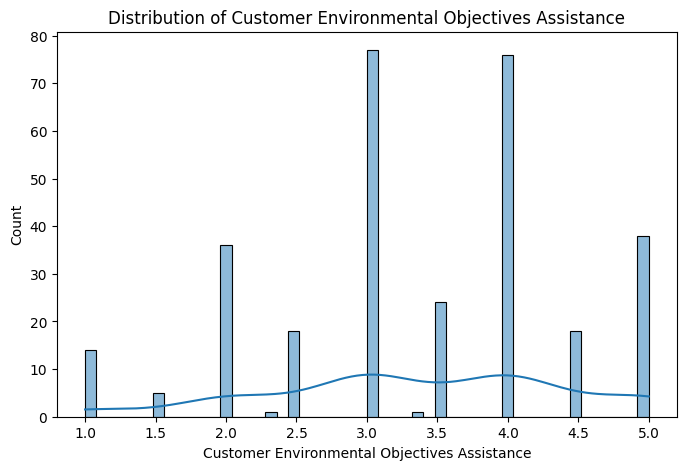

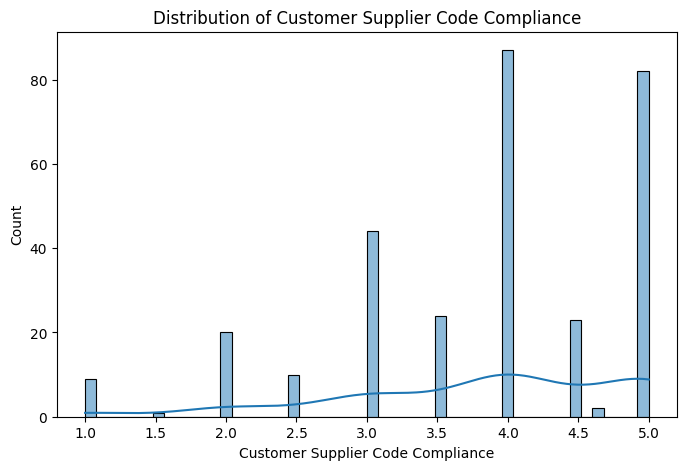

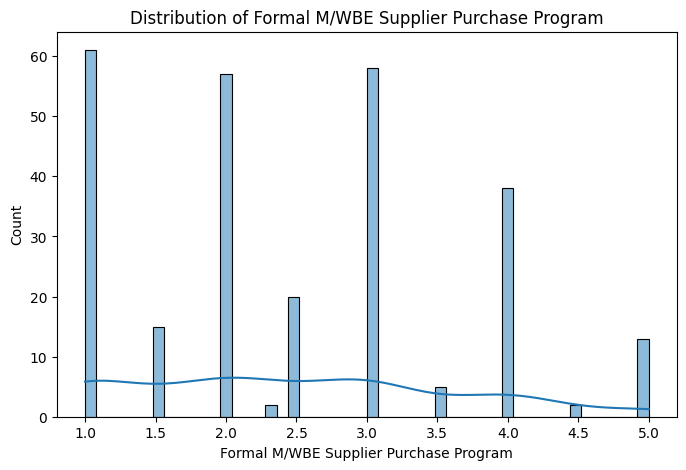

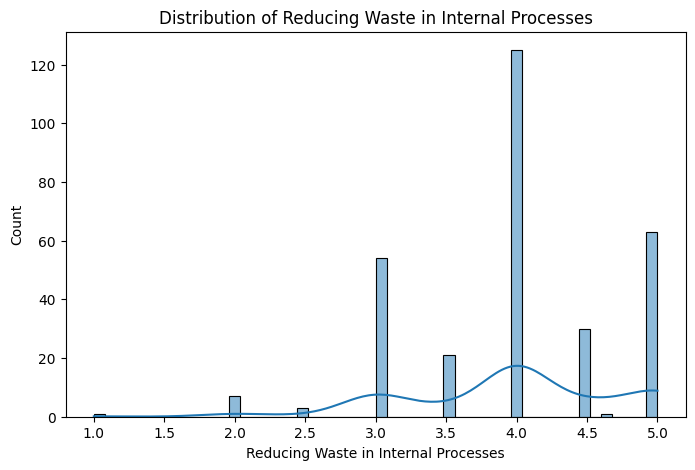

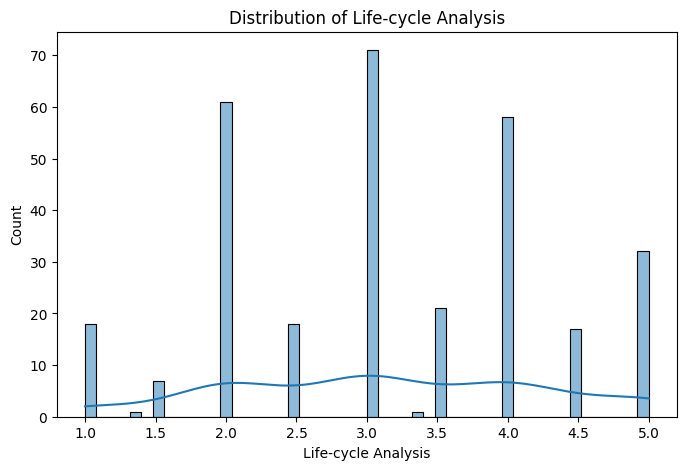

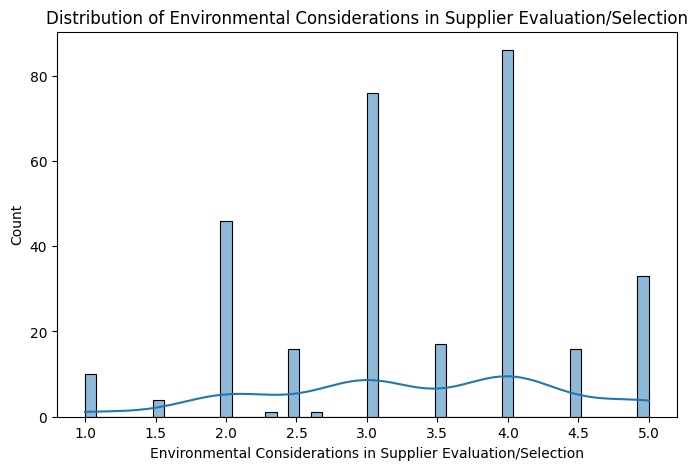

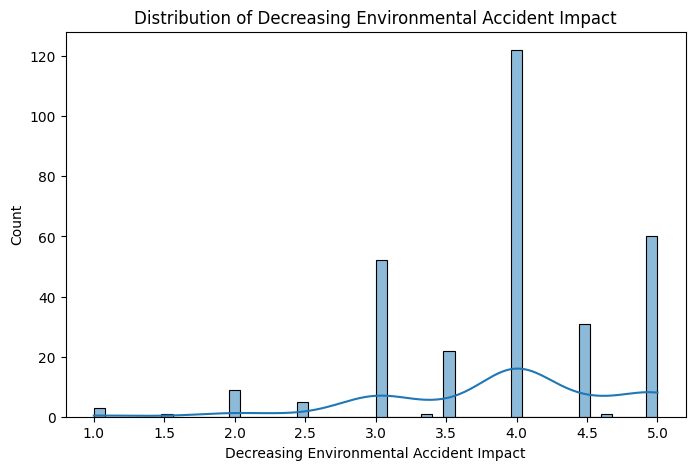

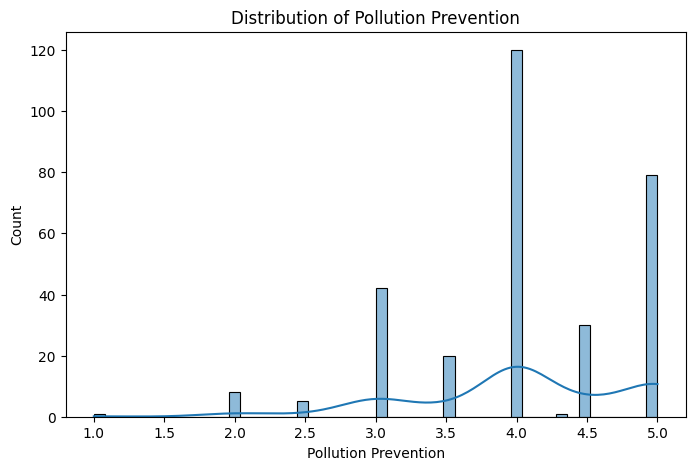

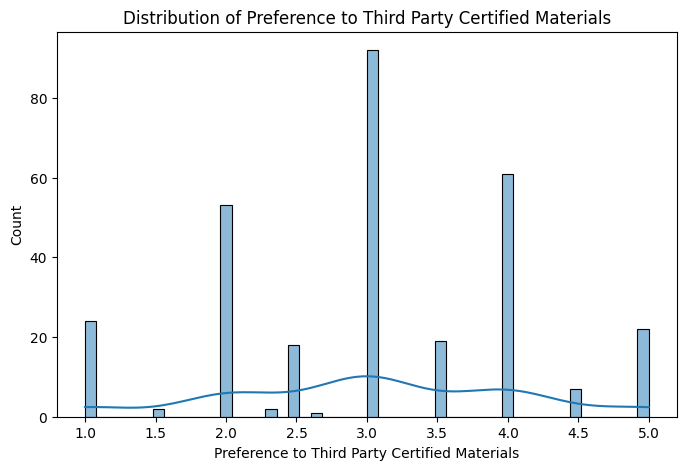

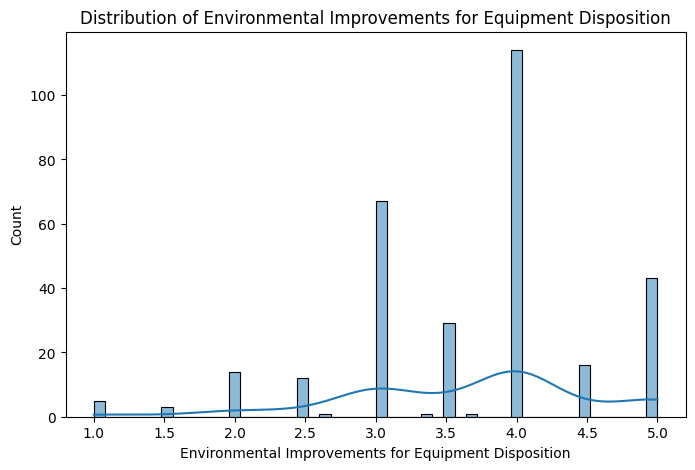

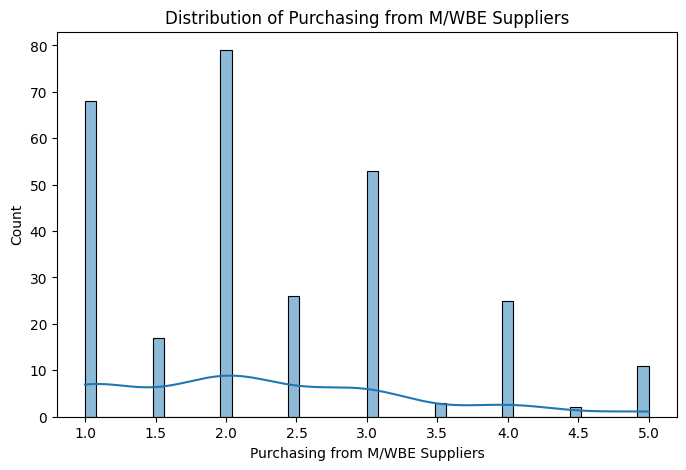

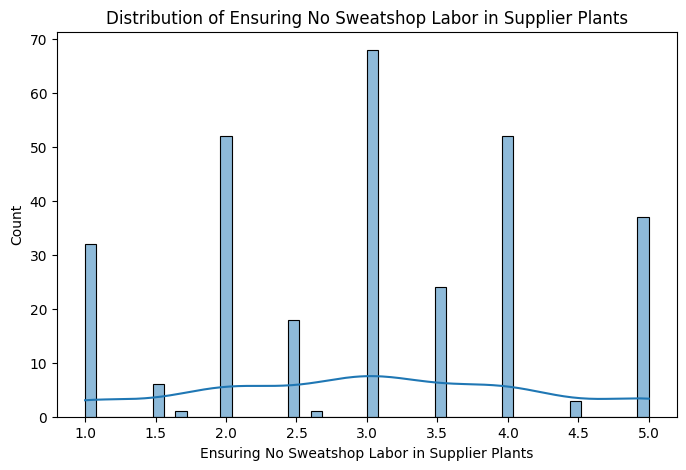

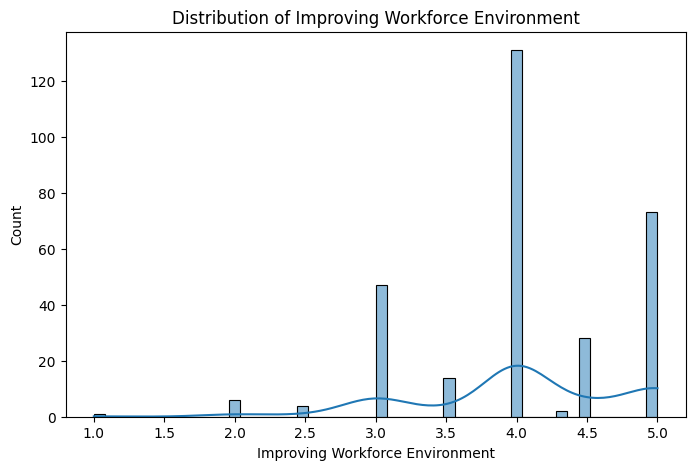

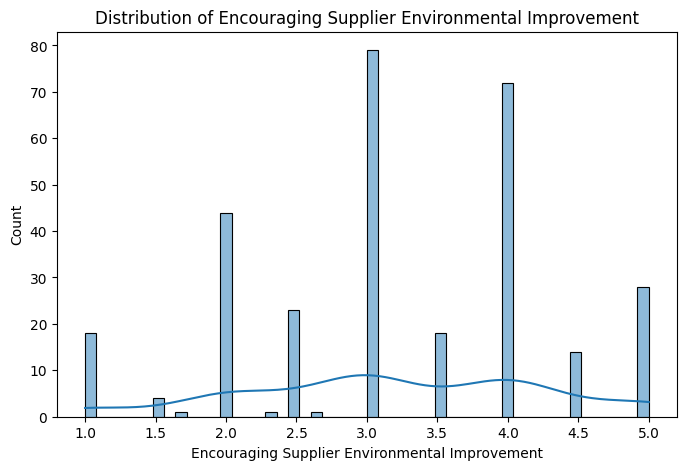

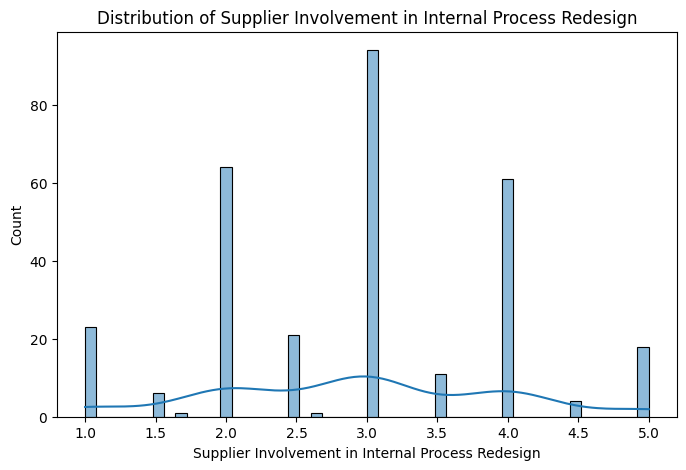

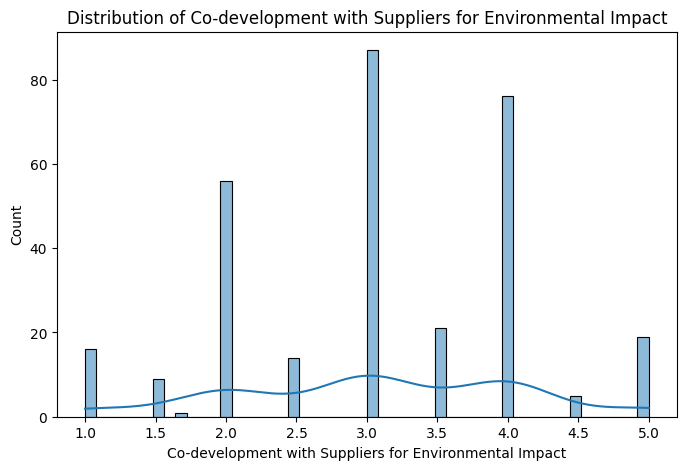

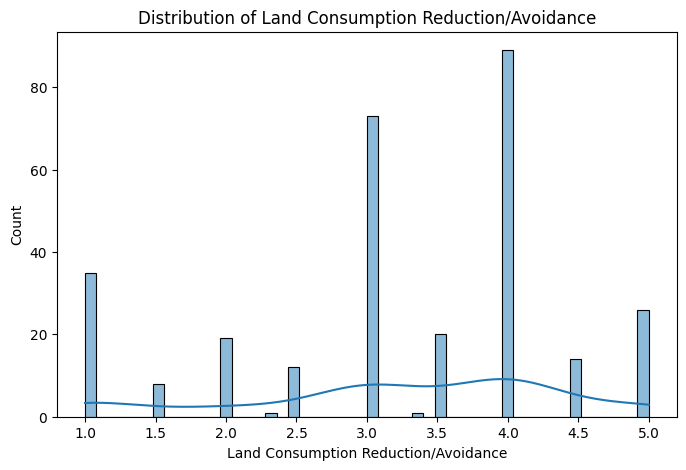

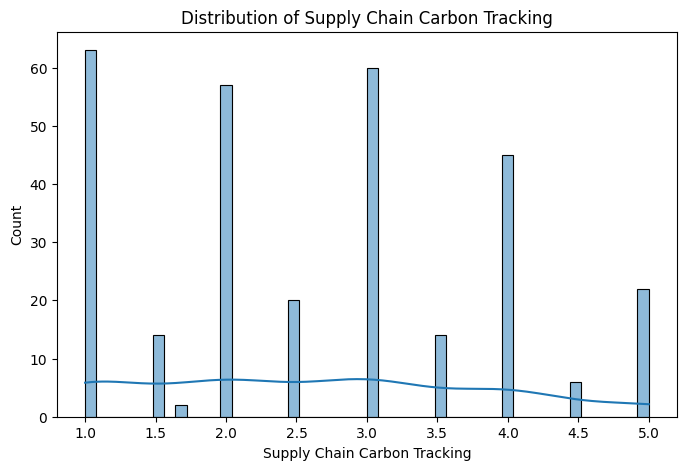

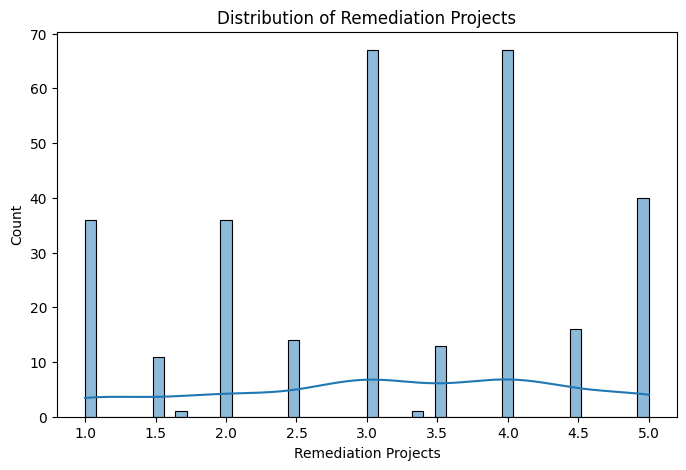

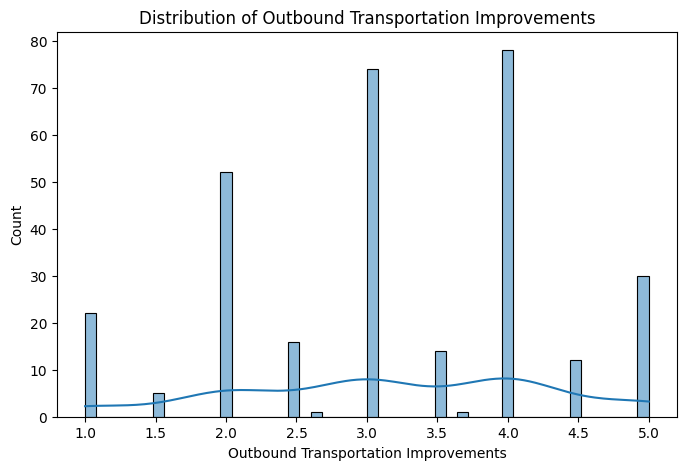

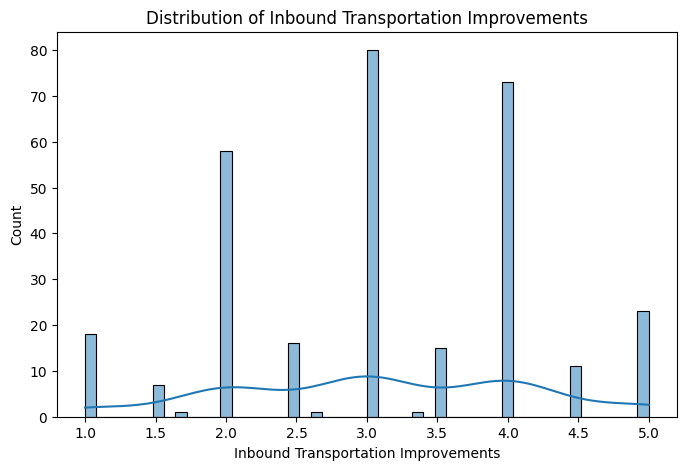

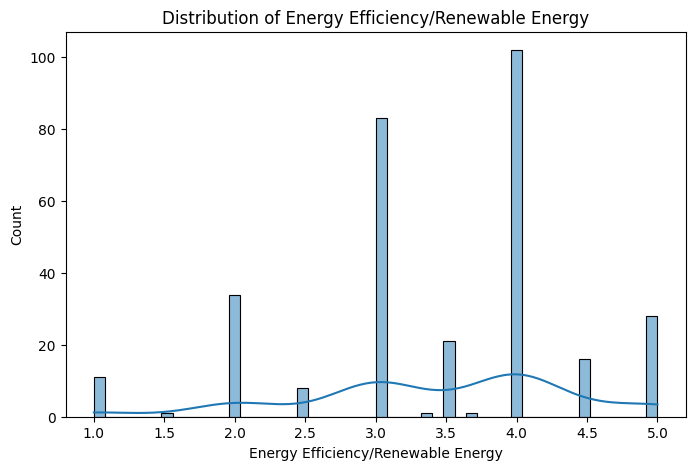

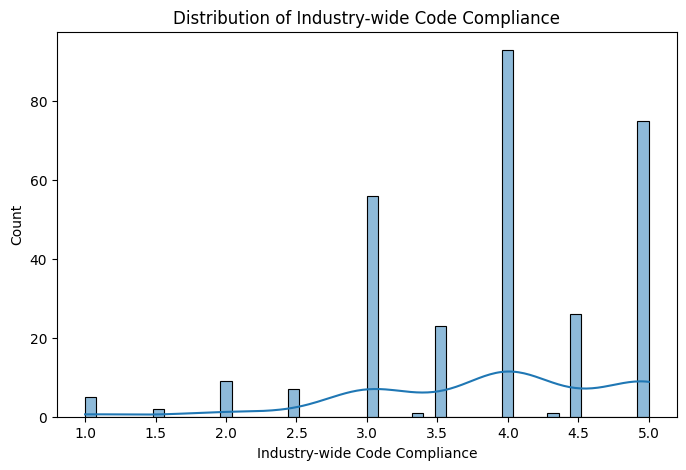

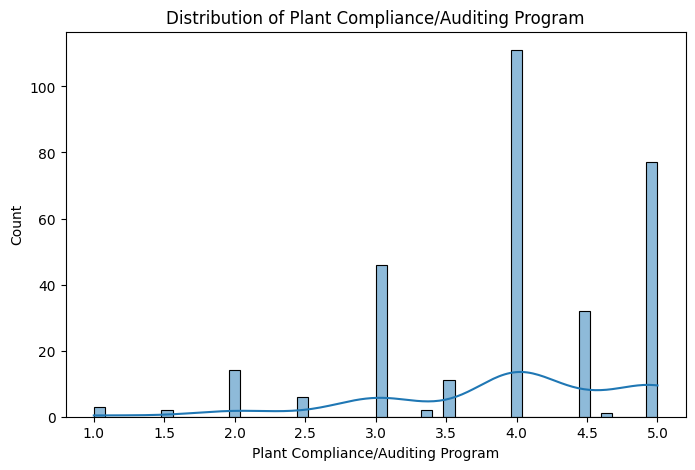

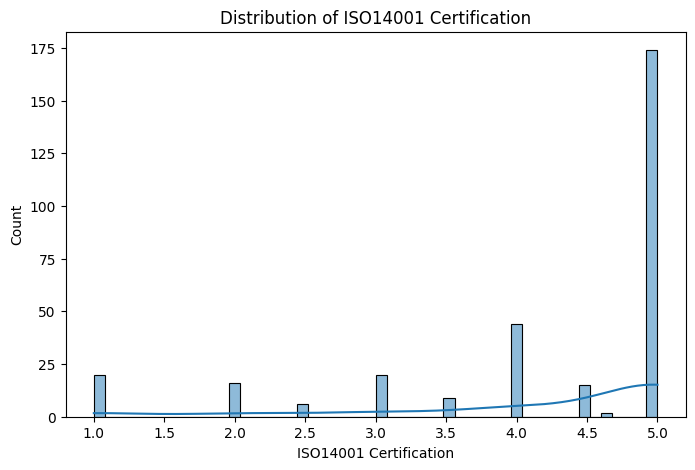

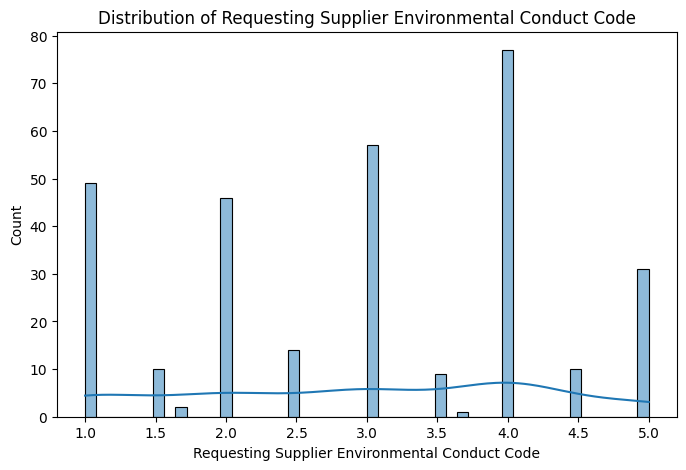

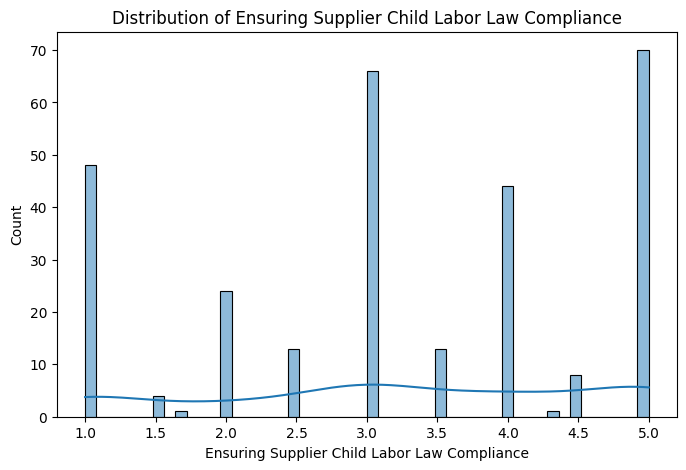

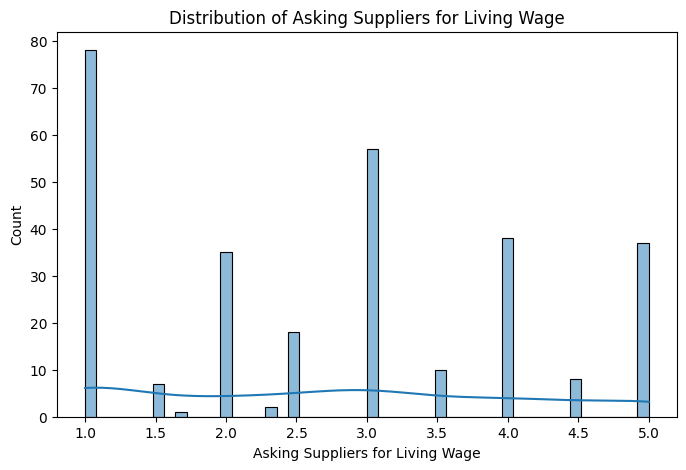

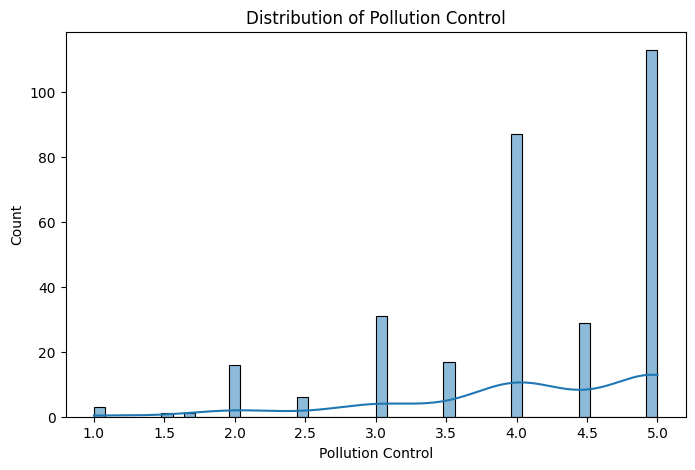

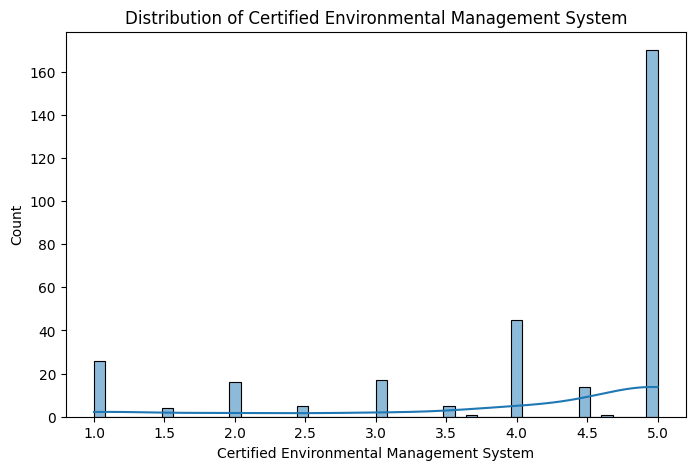

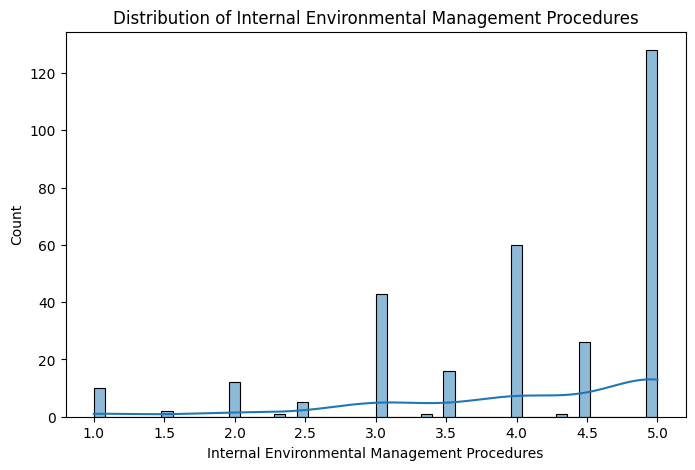

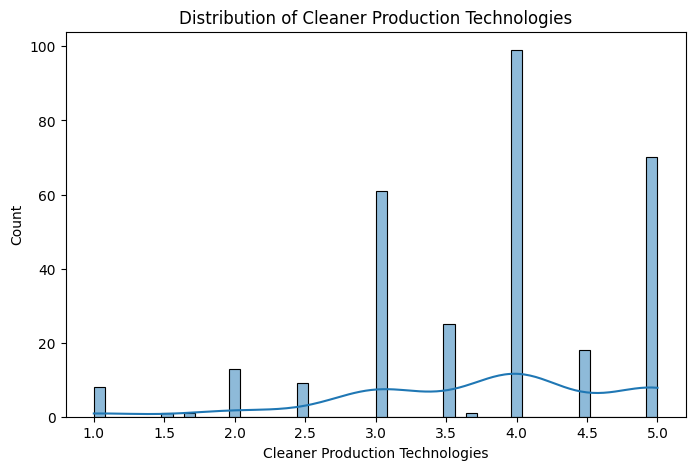

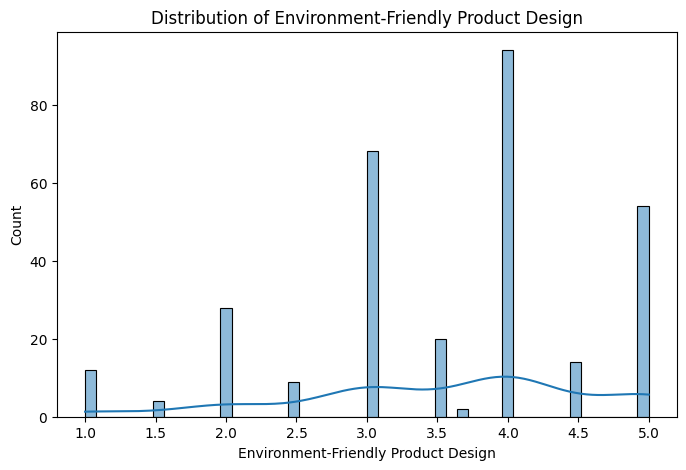

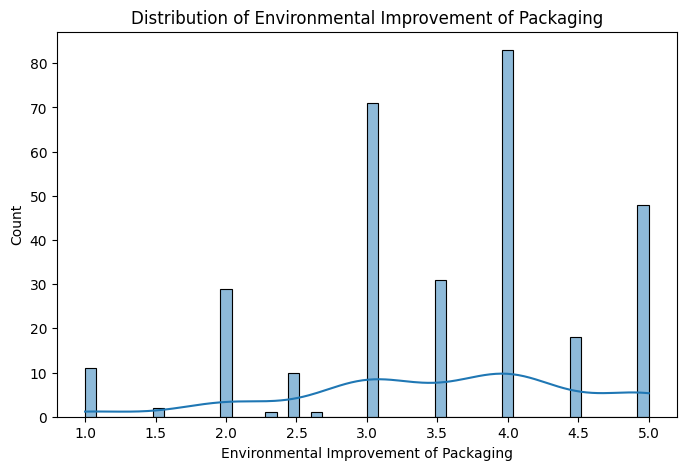

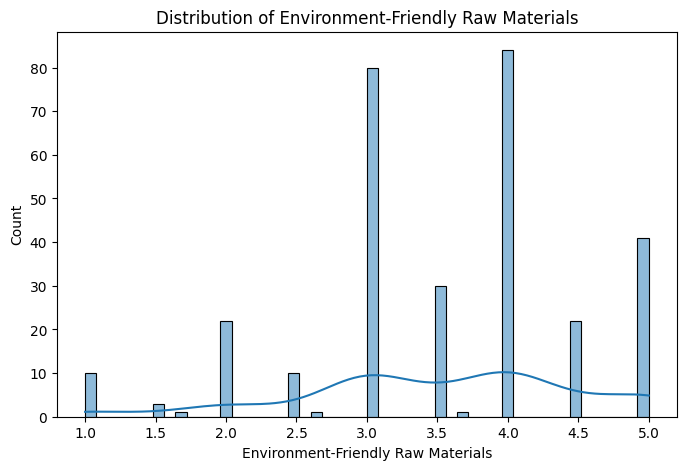

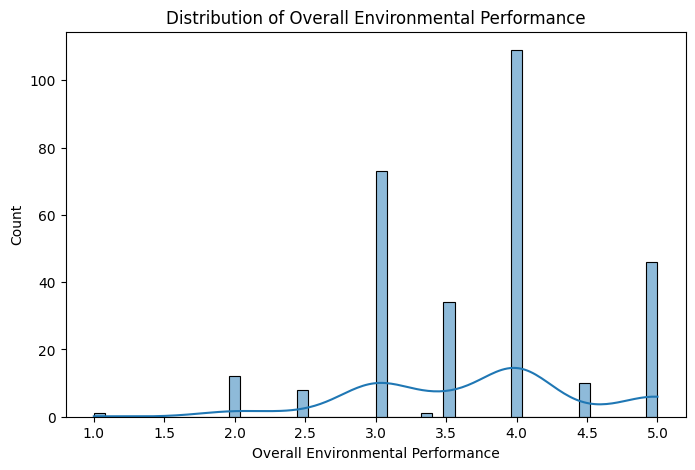

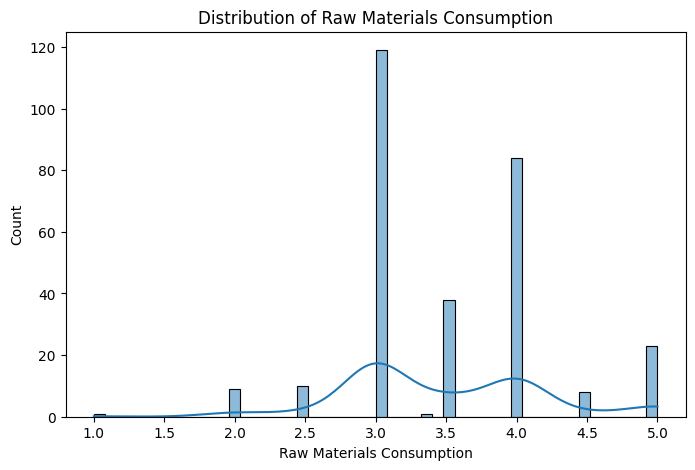

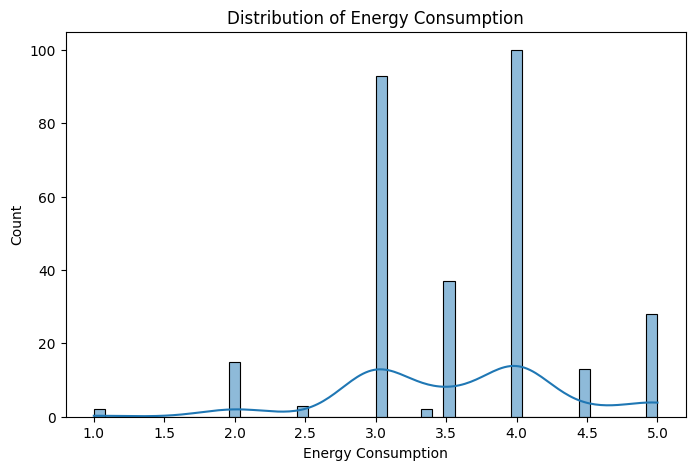

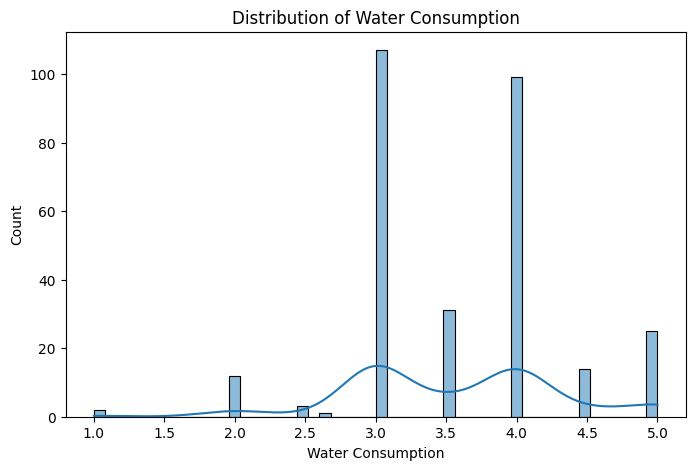

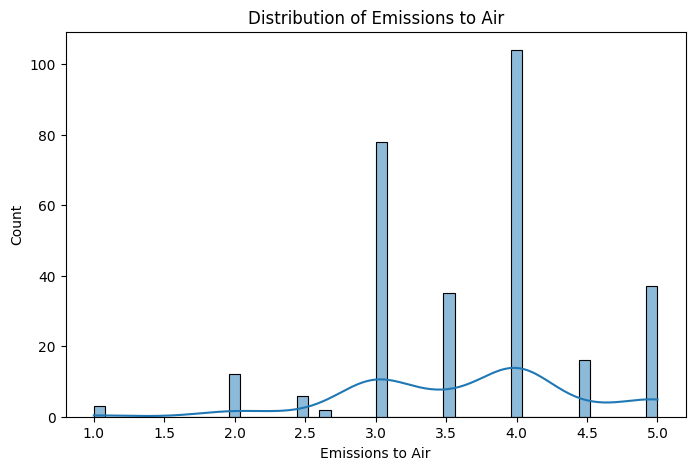

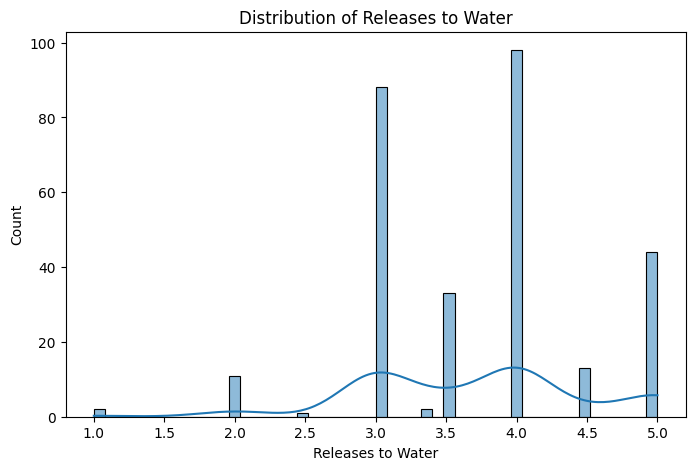

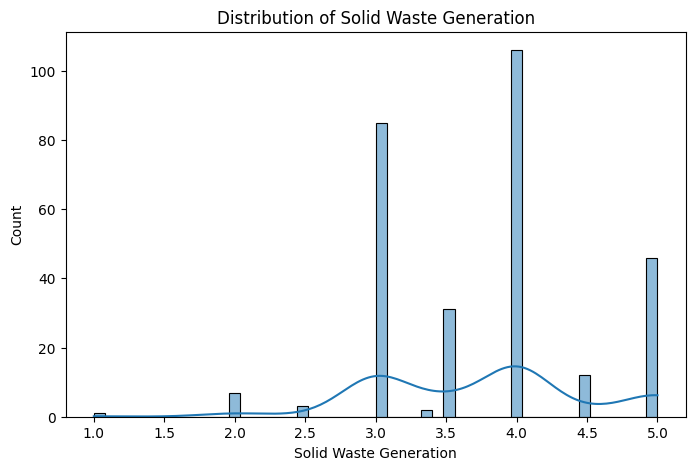

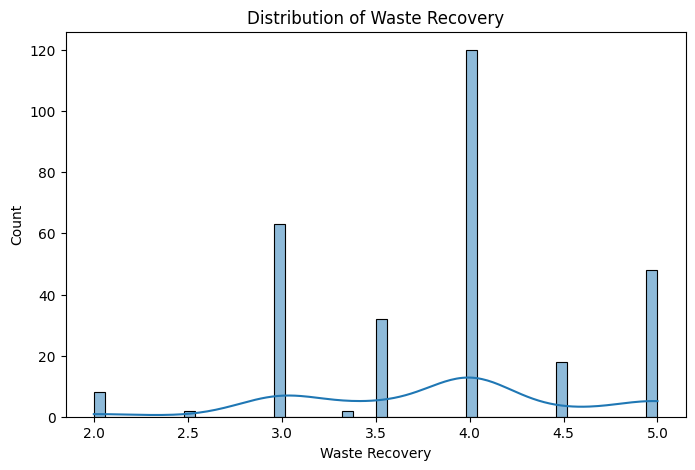

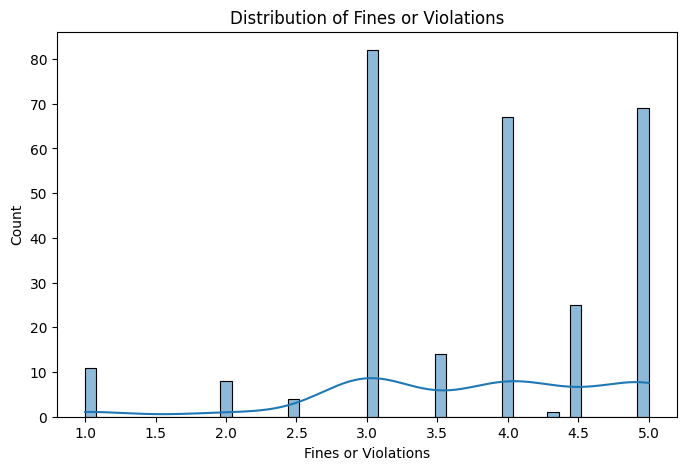

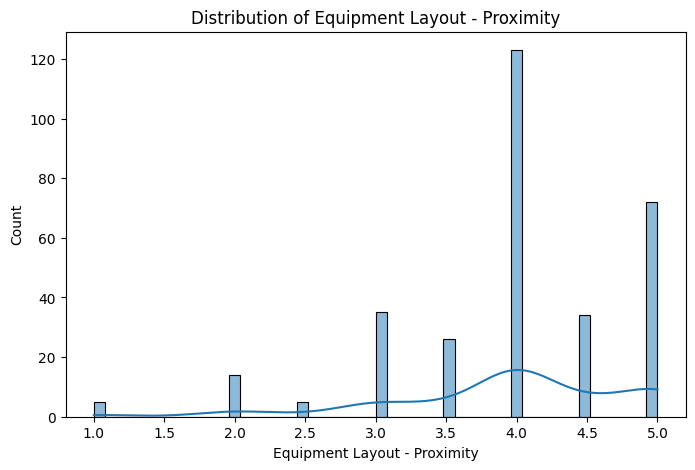

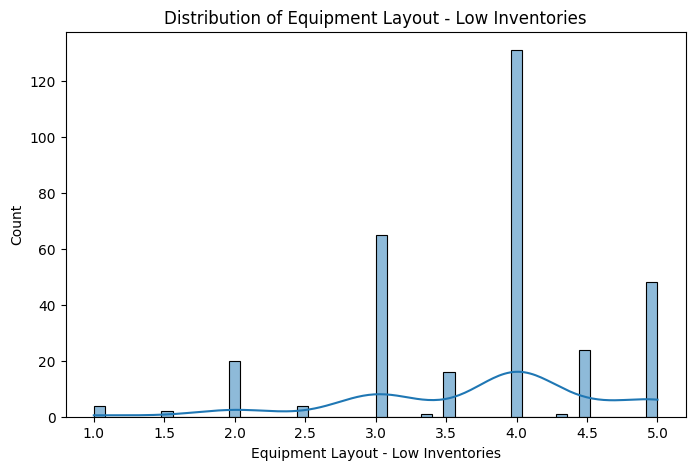

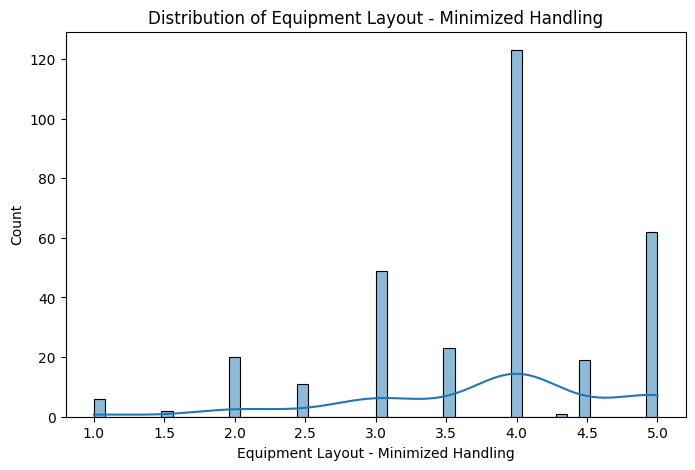

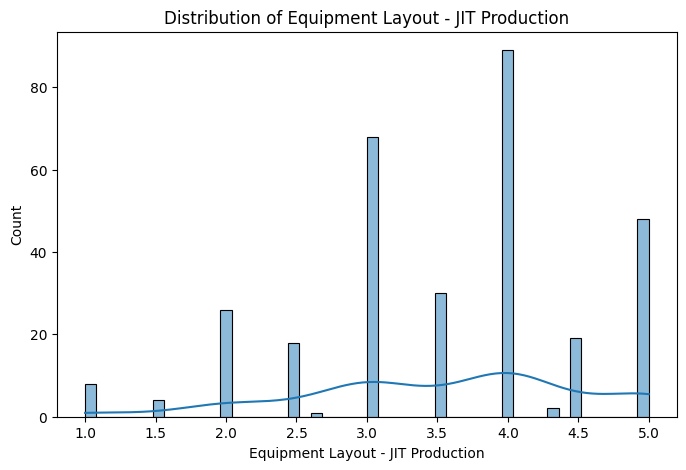

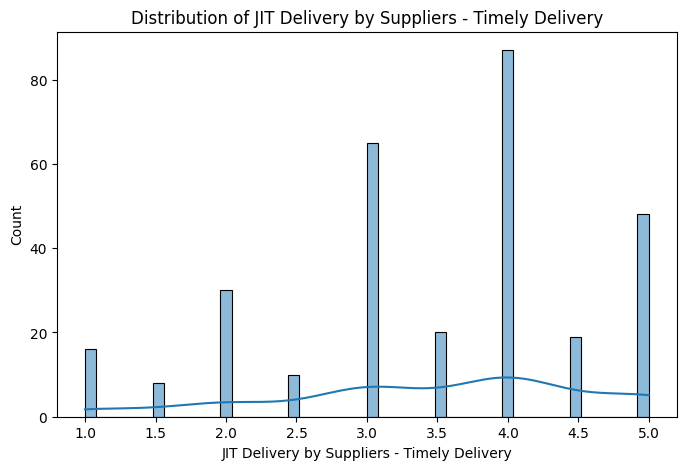

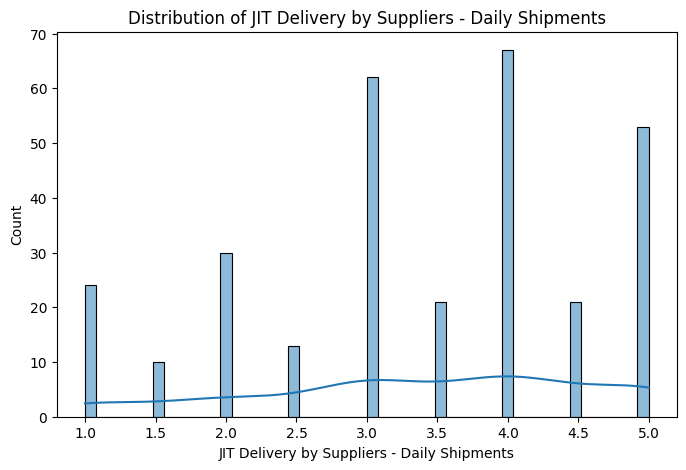

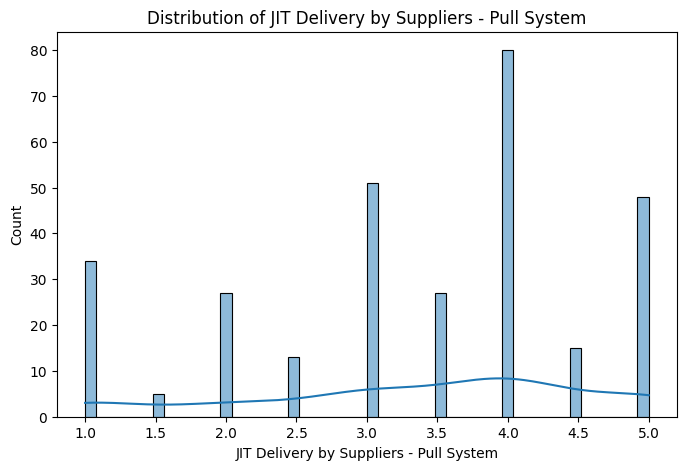

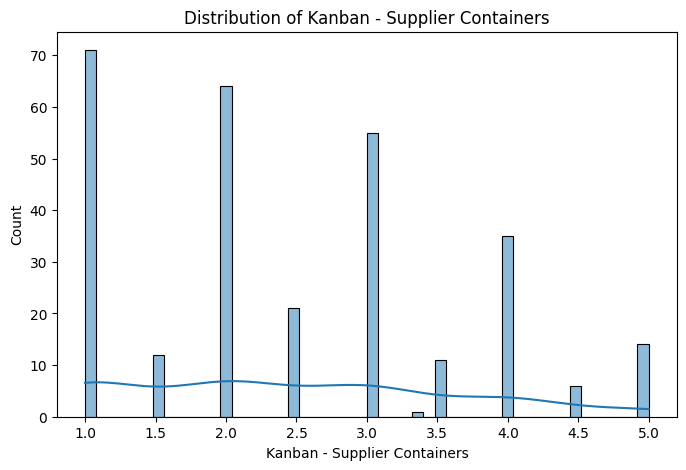

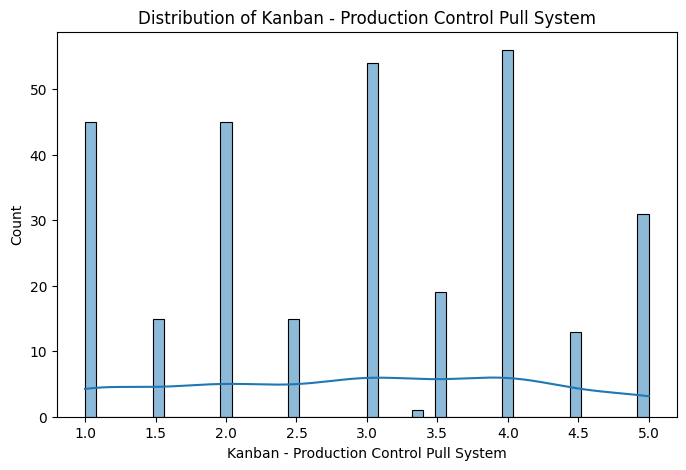

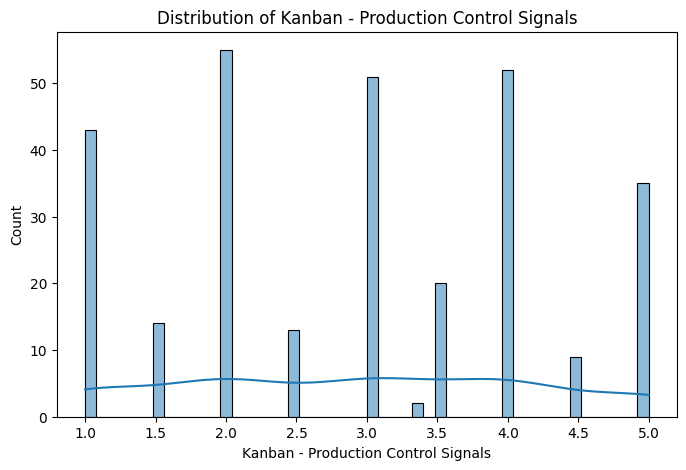

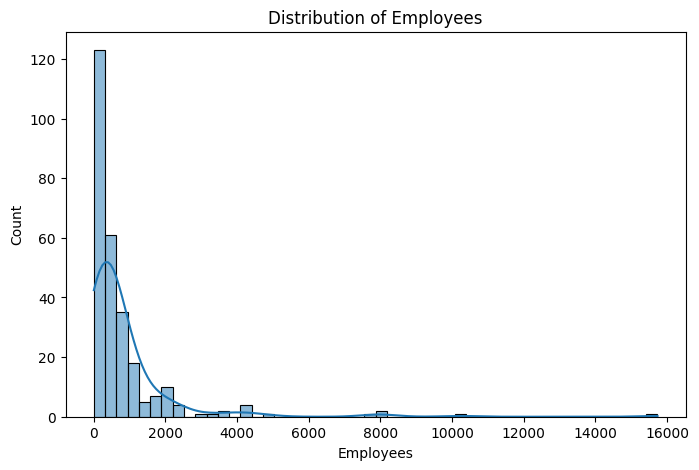

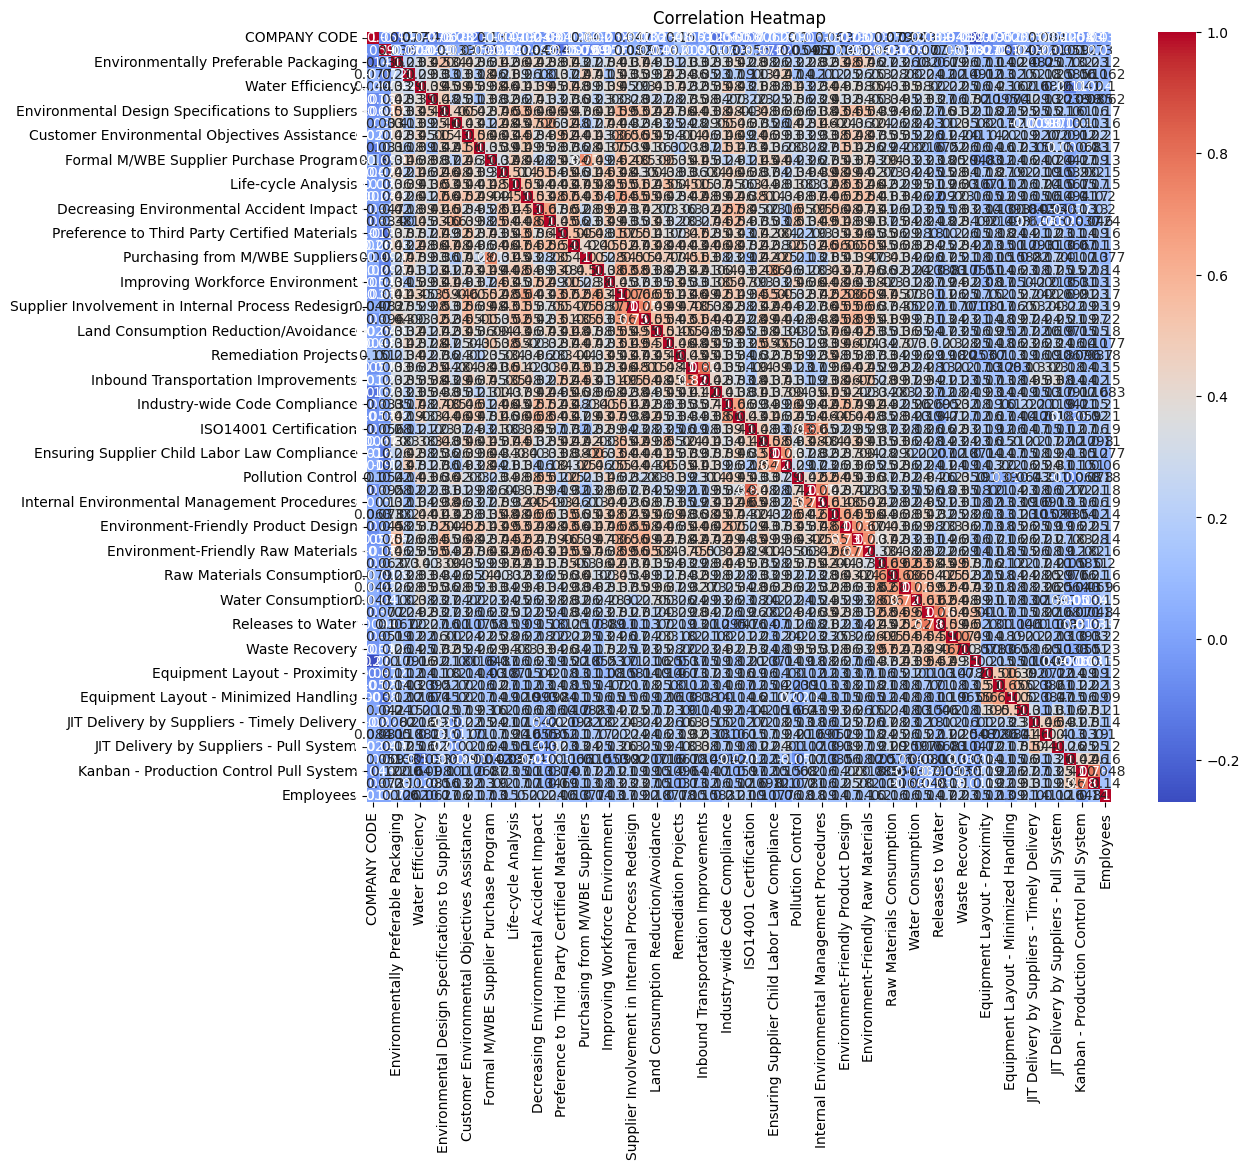


Normalized Data:

   COMPANY CODE  INDUSTRY  Environmentally Preferable Packaging  \
0      0.877193       1.0                                  0.75   
1      0.877741       0.0                                   NaN   
2      0.878289       0.0                                  0.50   
3      0.878838       1.0                                  0.25   
4      0.879386       1.0                                  0.25   

   Third Party Monitoring of Supplier Working Conditions  Water Efficiency  \
0                                               0.25                  0.75   
1                                                NaN                   NaN   
2                                               0.25                  0.50   
3                                               0.75                  0.25   
4                                               0.00                  0.50   

   Substituting Environmentally Preferable Direct Materials  \
0                                             

In [7]:

# Visualize the distribution of numerical variables
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(8,5))
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12,10))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Normalization (if needed)
# Here, we'll use Min-Max normalization as an example
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_features]), columns=numerical_features)

# Check normalized data
print("\nNormalized Data:\n")
print(data_normalized.head())
